In [1]:
#import openbabel
#import pybel
import sys
import os
import os.path
import csv
import pandas as pd
import argparse
import numpy as np
import itertools
import shutil
from itertools import combinations
import re
import collections
from collections import OrderedDict
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
basedir = '/Users/geemi/Downloads/CSD_data_Geemi/conf_energies'
df_gas_C= pd.read_csv(f'{basedir}/Gas_dataset_coformational_energy.csv')
df_wat_C = pd.read_csv(f'{basedir}/Water_dataset_coformational_energy.csv')
df_gas_S = pd.read_csv(f'{basedir}/Gas_dataset_strain_energy.csv')
df_wat_S = pd.read_csv(f'{basedir}/Water_dataset_strain_energy.csv')

In [6]:
df_gas_C.head()

,Refcodes,Delta_conformational_energy(kJ/mol),components
0,ABADIS01_ABADIS,0.577053,1_1
1,ABEFUJ01_ABEFUJ,15.306376,1_1
2,ABEYOY01_ABEYOY,2.289095,1_1
3,ABIZAP01_ABIZAP,0.000026,1_1
4,ACAPIE01_ACAPIE,0.000368,1_1


In [7]:
strain_e = list(df_wat_S['Delta_strain_energy'])
conf_e = list(df_wat_C['Delta_conformational_energy(kJ/mol)'])

Gas strainE 98% at: 24.87391621652247
Gas confE 98% at: 32.9489446133133
Water strainE 98% at: 15.499548694404588
Water confE 98% at: 25.832430985304747


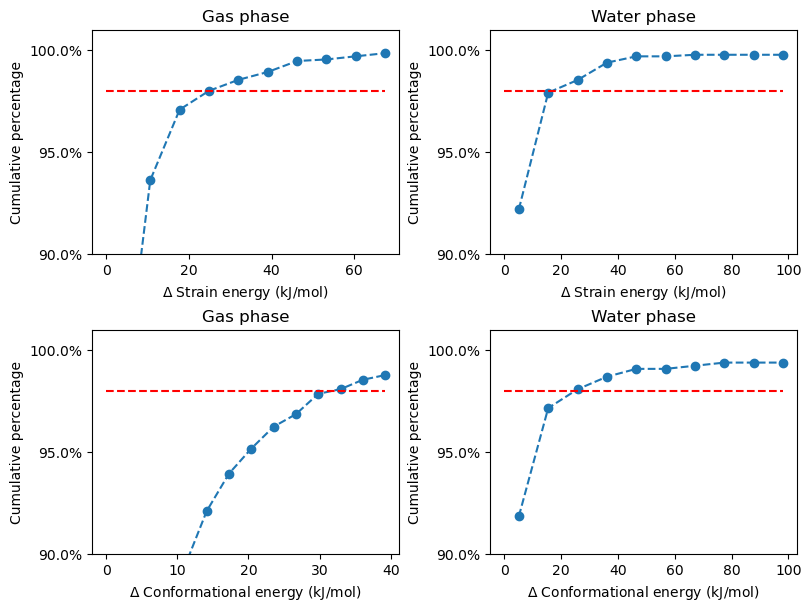

In [27]:
#data_path = basedir
s_labels = ['A','B',]
c_labels = ['C','D']
solvents = ['Gas', 'Water']
axd = plt.figure(figsize=(8,6),constrained_layout=True).subplot_mosaic(
    """
    AB
    CD
    """
)

for i in range(2):
    phase = solvents[i]
    conf_energy = list(pd.read_csv(f'{phase}_dataset_coformational_energy.csv')['Delta_conformational_energy(kJ/mol)'])
    strain_energy = list(pd.read_csv(f'{phase}_dataset_strain_energy.csv')['Delta_strain_energy'])
    if i==0: nbins = 2000
    else: nbins = 50000
    
    # Strain energy data
    n_s, bins_s = np.histogram(strain_energy,nbins)
    x_s = [(bins_s[j]+bins_s[j+1])/2 for j in range(len(bins_s)-1)]
    y_s = np.cumsum(n_s)/np.sum(n_s)
    thresh_s = max(x_s*(y_s*100<98.1))
    print(f'{phase} strainE 98% at:',thresh_s)
    # Conf energy data
    n_c, bins_c = np.histogram(conf_energy,nbins)
    x_c = [(bins_c[j]+bins_c[j+1])/2 for j in range(len(bins_c)-1)]
    y_c = np.cumsum(n_c)/np.sum(n_c)
    thresh_c = max(x_c*(y_c*100<98.1))
    print(f'{phase} confE 98% at:',thresh_c)
    
    
    # plots
    if c_labels[i] != 'C':
        axd[c_labels[i]].plot(x_c[:10],y_c[:10]*100,'--o')
        axd[c_labels[i]].hlines(98.00,0,max(x_c[:10]),colors='red',linestyles='dashed')
    else:
        axd[c_labels[i]].plot(x_c[:13],y_c[:13]*100,'--o')
        axd[c_labels[i]].hlines(98.00,0,max(x_c[:13]),colors='red',linestyles='dashed')

    axd[s_labels[i]].plot(x_s[:10],y_s[:10]*100,'--o')
    axd[s_labels[i]].hlines(98.00,0,max(x_s[:10]),colors='red',linestyles='dashed')
    axd[s_labels[i]].set_title(f'{phase} phase')
    axd[c_labels[i]].set_title(f'{phase} phase')
    axd[s_labels[i]].set_xlabel(r'$\Delta$ Strain energy (kJ/mol)')
    axd[c_labels[i]].set_xlabel(r'$\Delta$ Conformational energy (kJ/mol)')
    axd[s_labels[i]].set_ylabel('Cumulative percentage')
    axd[c_labels[i]].set_ylabel('Cumulative percentage')
    axd[s_labels[i]].yaxis.set_major_formatter(ticker.PercentFormatter())
    axd[c_labels[i]].yaxis.set_major_formatter(ticker.PercentFormatter())
    axd[c_labels[i]].set_yticks(np.arange(90, 110, 5.0))
    axd[s_labels[i]].set_yticks(np.arange(90, 110, 5.0))
    axd[s_labels[i]].set_ylim(90,101)
    axd[c_labels[i]].set_ylim(90,101)

    
plt.savefig(f'energy_data_distributions.png', dpi=300, facecolor='w')
plt.show()